In [6]:
from datetime import datetime,timedelta

In [16]:
exec_datetime = '2019-12-07 07:21:32'
wrf_run = '0'
wrf_run = int(wrf_run)
gfs_hour = '06'
exec_datetime = datetime.strptime(exec_datetime, '%Y-%m-%d %H:%M:%S')
print(exec_datetime)
exec_date_str = exec_datetime.strftime('%Y-%m-%d')
exec_date = datetime.strptime(exec_date_str, '%Y-%m-%d')
print(exec_date)

2019-12-07 07:21:32
2019-12-07 00:00:00


In [17]:
ts_start_date = exec_date - timedelta(days=wrf_run)
ts_start_date_str = ts_start_date.strftime('%Y-%m-%d')
print(ts_start_date_str)

2019-12-07


In [19]:
gfs_ts_start_utc_str = '{} {}:00:00'.format(ts_start_date_str, gfs_hour)
print(gfs_ts_start_utc_str)

2019-12-07 06:00:00


In [20]:
gfs_ts_start_utc = datetime.strptime(gfs_ts_start_utc_str, '%Y-%m-%d %H:%M:%S')
gfs_ts_start_local = gfs_ts_start_utc + timedelta(hours=5, minutes=30)
print(gfs_ts_start_local)

2019-12-07 11:30:00


In [21]:
gfs_ts_end_local = gfs_ts_start_local + timedelta(days=3)
print(gfs_ts_end_local)

2019-12-10 11:30:00


In [4]:
station_accuracy = '60'
obs_stations = 'IBATTARA2-62, Kottawa North Dharmapala School-55,Kohuwala'
station_list = obs_stations.split(",")
print(station_list)
formatted_list = []
for station in station_list:
    station_val = station.split('-')
    if len(station_val)==2:
        formatted_list.append([station_val[0],station_val[1]])
    else:
        formatted_list.append([station_val[0],station_accuracy])
print(formatted_list)

['IBATTARA2-62', ' Kottawa North Dharmapala School-55', 'Kohuwala']
[['IBATTARA2', '62'], [' Kottawa North Dharmapala School', '55'], ['Kohuwala', '60']]


In [7]:
import sys
sys.path.insert(0, '/home/hasitha/PycharmProjects/DSS-Framework/db_util')
from gen_db import CurwFcstAdapter, CurwObsAdapter, CurwSimAdapter
from dss_db import RuleEngineAdapter

def get_curw_dss_adapter(db_config=None):
    if db_config is None:
        db_config = Variable.get('db_config', deserialize_json=True)
    adapter = RuleEngineAdapter.get_instance(db_config)
    return adapter


def get_curw_fcst_adapter(db_config=None):
    if db_config is None:
        db_config = Variable.get('fcst_db_config', deserialize_json=True)
    adapter = CurwFcstAdapter.get_instance(db_config)
    return adapter


def get_curw_obs_adapter(db_config=None):
    if db_config is None:
        db_config = Variable.get('obs_db_config', deserialize_json=True)
    adapter = CurwObsAdapter.get_instance(db_config)
    return adapter


def get_curw_sim_adapter(db_config=None):
    if db_config is None:
        db_config = Variable.get('sim_db_config', deserialize_json=True)
    adapter = CurwSimAdapter.get_instance(db_config)
    return adapter

obs_db_config = {'mysql_user': 'admin', 'mysql_password': 'floody', 'mysql_host': '35.227.163.211',
               'mysql_db': 'curw_obs', 'log_path': '/home/hasitha/PycharmProjects/DSS-Framework/log'}
sim_db_config = {'mysql_user': 'admin', 'mysql_password': 'floody', 'mysql_host': '35.227.163.211',
                  'mysql_db': 'curw_sim', 'log_path': '/home/hasitha/PycharmProjects/DSS-Framework/log'}
fcst_db_config = {'mysql_user': 'admin', 'mysql_password': 'floody', 'mysql_host': '35.227.163.211',
                'mysql_db': 'curw_fcst', 'log_path': '/home/hasitha/PycharmProjects/DSS-Framework/log'}
dss_db_config = {'mysql_user': 'admin', 'mysql_password': 'floody', 'mysql_host': '35.227.163.211',
                'mysql_db': 'dss', 'log_path': '/home/hasitha/PycharmProjects/DSS-Framework/log'}

dss_adapter = get_curw_dss_adapter(dss_db_config)
fcst_adapter = get_curw_fcst_adapter(fcst_db_config)
obs_adapter = get_curw_obs_adapter(obs_db_config)
sim_adapter = get_curw_sim_adapter(sim_db_config)

get_instance|db_config :  {'mysql_user': 'admin', 'mysql_password': 'floody', 'mysql_host': '35.227.163.211', 'mysql_db': 'curw_fcst', 'log_path': '/home/hasitha/PycharmProjects/DSS-Framework/log'}
get_instance|db_config :  {'mysql_user': 'admin', 'mysql_password': 'floody', 'mysql_host': '35.227.163.211', 'mysql_db': 'curw_obs', 'log_path': '/home/hasitha/PycharmProjects/DSS-Framework/log'}
get_instance|db_config :  {'mysql_user': 'admin', 'mysql_password': 'floody', 'mysql_host': '35.227.163.211', 'mysql_db': 'curw_sim', 'log_path': '/home/hasitha/PycharmProjects/DSS-Framework/log'}


In [8]:
def calculate_wrf_rule_accuracy(wrf_rule, exec_datetime, dss_adapter):
    print('calculate_wrf_rule_accuracy|wrf_rule : ', wrf_rule)
    print('calculate_wrf_rule_accuracy|execution_date : ', exec_datetime)
    wrf_model = 'WRF_{}'.format(wrf_rule['model'])
    print('calculate_wrf_rule_accuracy|wrf_model : ', wrf_model)
    wrf_version = wrf_rule['version']
    wrf_run = wrf_rule['rule_info']['run']
    gfs_hour = wrf_rule['rule_info']['hour']
    accuracy_rule_id = wrf_rule['rule_info']['accuracy_rule']
    sim_tag = 'gfs_d{}_{}'.format(wrf_run, gfs_hour)
    print('calculate_wrf_rule_accuracy|sim_tag : ', sim_tag)
    accuracy_rule = dss_adapter.get_accuracy_rule_info_by_id(accuracy_rule_id)
    print('calculate_wrf_rule_accuracy|accuracy_rule : ', accuracy_rule)
    obs_station_list = format_obs_station_list(accuracy_rule['observed_stations'], accuracy_rule['station_accuracy'])
    if len(obs_station_list) > 0:
        for [obs_station, accuracy_level] in obs_station_list:
            calculate_station_accuracy(obs_station, wrf_model, wrf_version, wrf_run, gfs_hour, exec_datetime, sim_tag)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

COMMON_DATE_TIME_FORMAT = "%Y-%m-%d %H:%M:%S"
fcst_rain_file = '/home/hasitha/PycharmProjects/DSS-Framework/input/rain_fcst.csv'
obs_rain_file = '/home/hasitha/PycharmProjects/DSS-Framework/input/rain_obs.csv'

In [21]:
fcst_df = pd.read_csv(fcst_rain_file) 
print(fcst_df)
obs_df = pd.read_csv(obs_rain_file) 
print(obs_df)

                    time  value
0    2019-11-30 00:00:00  0.000
1    2019-11-30 00:15:00  0.000
2    2019-11-30 00:30:00  0.000
3    2019-11-30 00:45:00  0.000
4    2019-11-30 01:00:00  0.061
..                   ...    ...
282  2019-12-02 22:30:00  0.006
283  2019-12-02 22:45:00  0.024
284  2019-12-02 23:00:00  0.054
285  2019-12-02 23:15:00  0.002
286  2019-12-02 23:30:00  0.000

[287 rows x 2 columns]
                    time  value
0    2019-11-30 00:00:00    0.0
1    2019-11-30 00:05:00    0.0
2    2019-11-30 00:10:00    0.0
3    2019-11-30 00:15:00    0.0
4    2019-11-30 00:20:00    0.0
..                   ...    ...
854  2019-12-02 23:10:00    0.0
855  2019-12-02 23:15:00    0.0
856  2019-12-02 23:20:00    0.0
857  2019-12-02 23:25:00    0.0
858  2019-12-02 23:30:00    0.0

[859 rows x 2 columns]


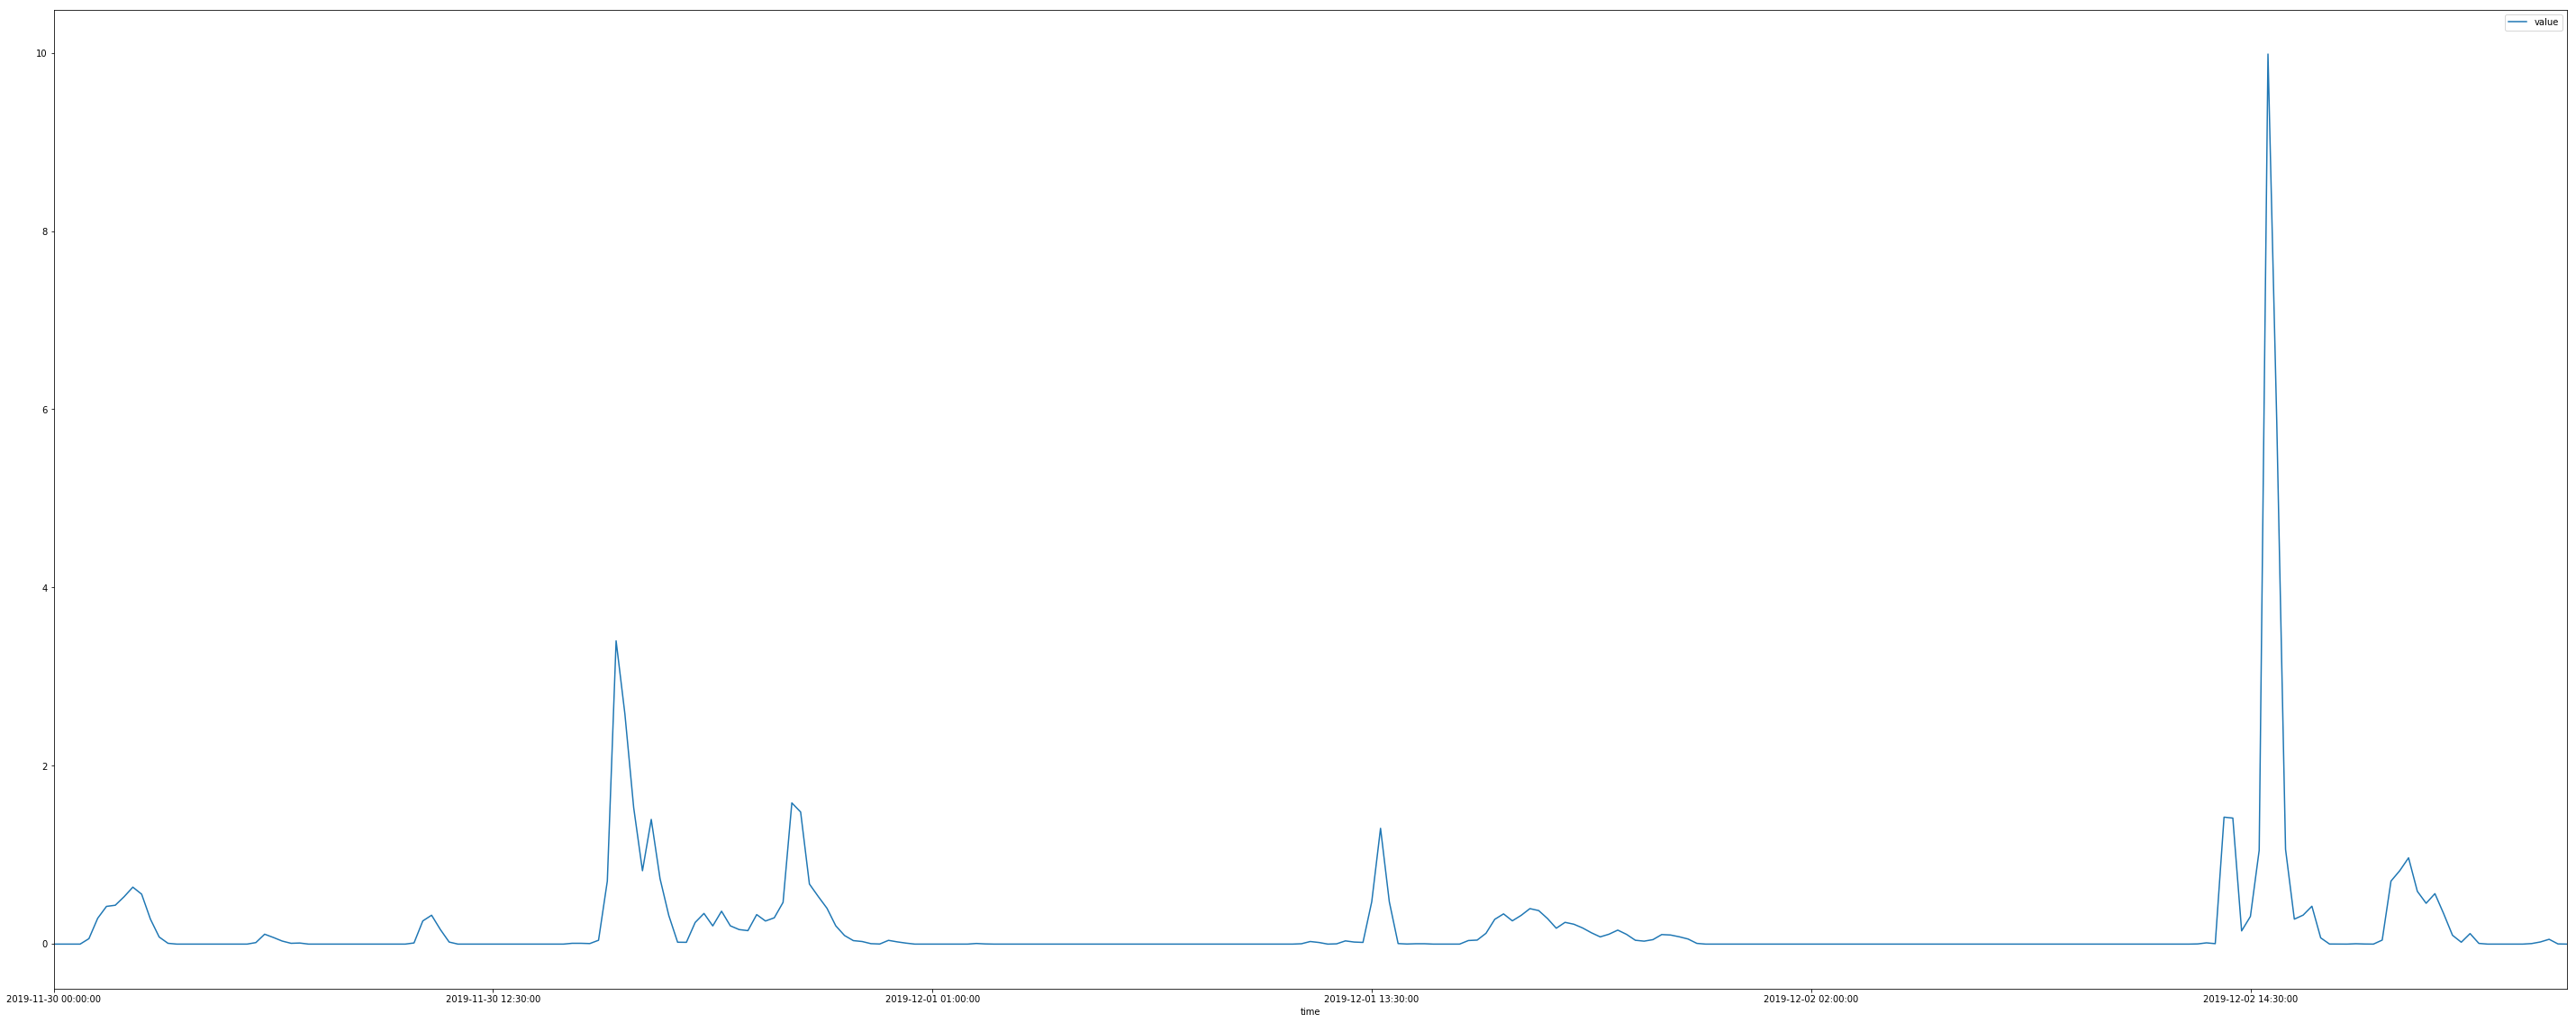

In [22]:
fcst_df.plot.line(x='time', y='value' ,figsize=(50,20))

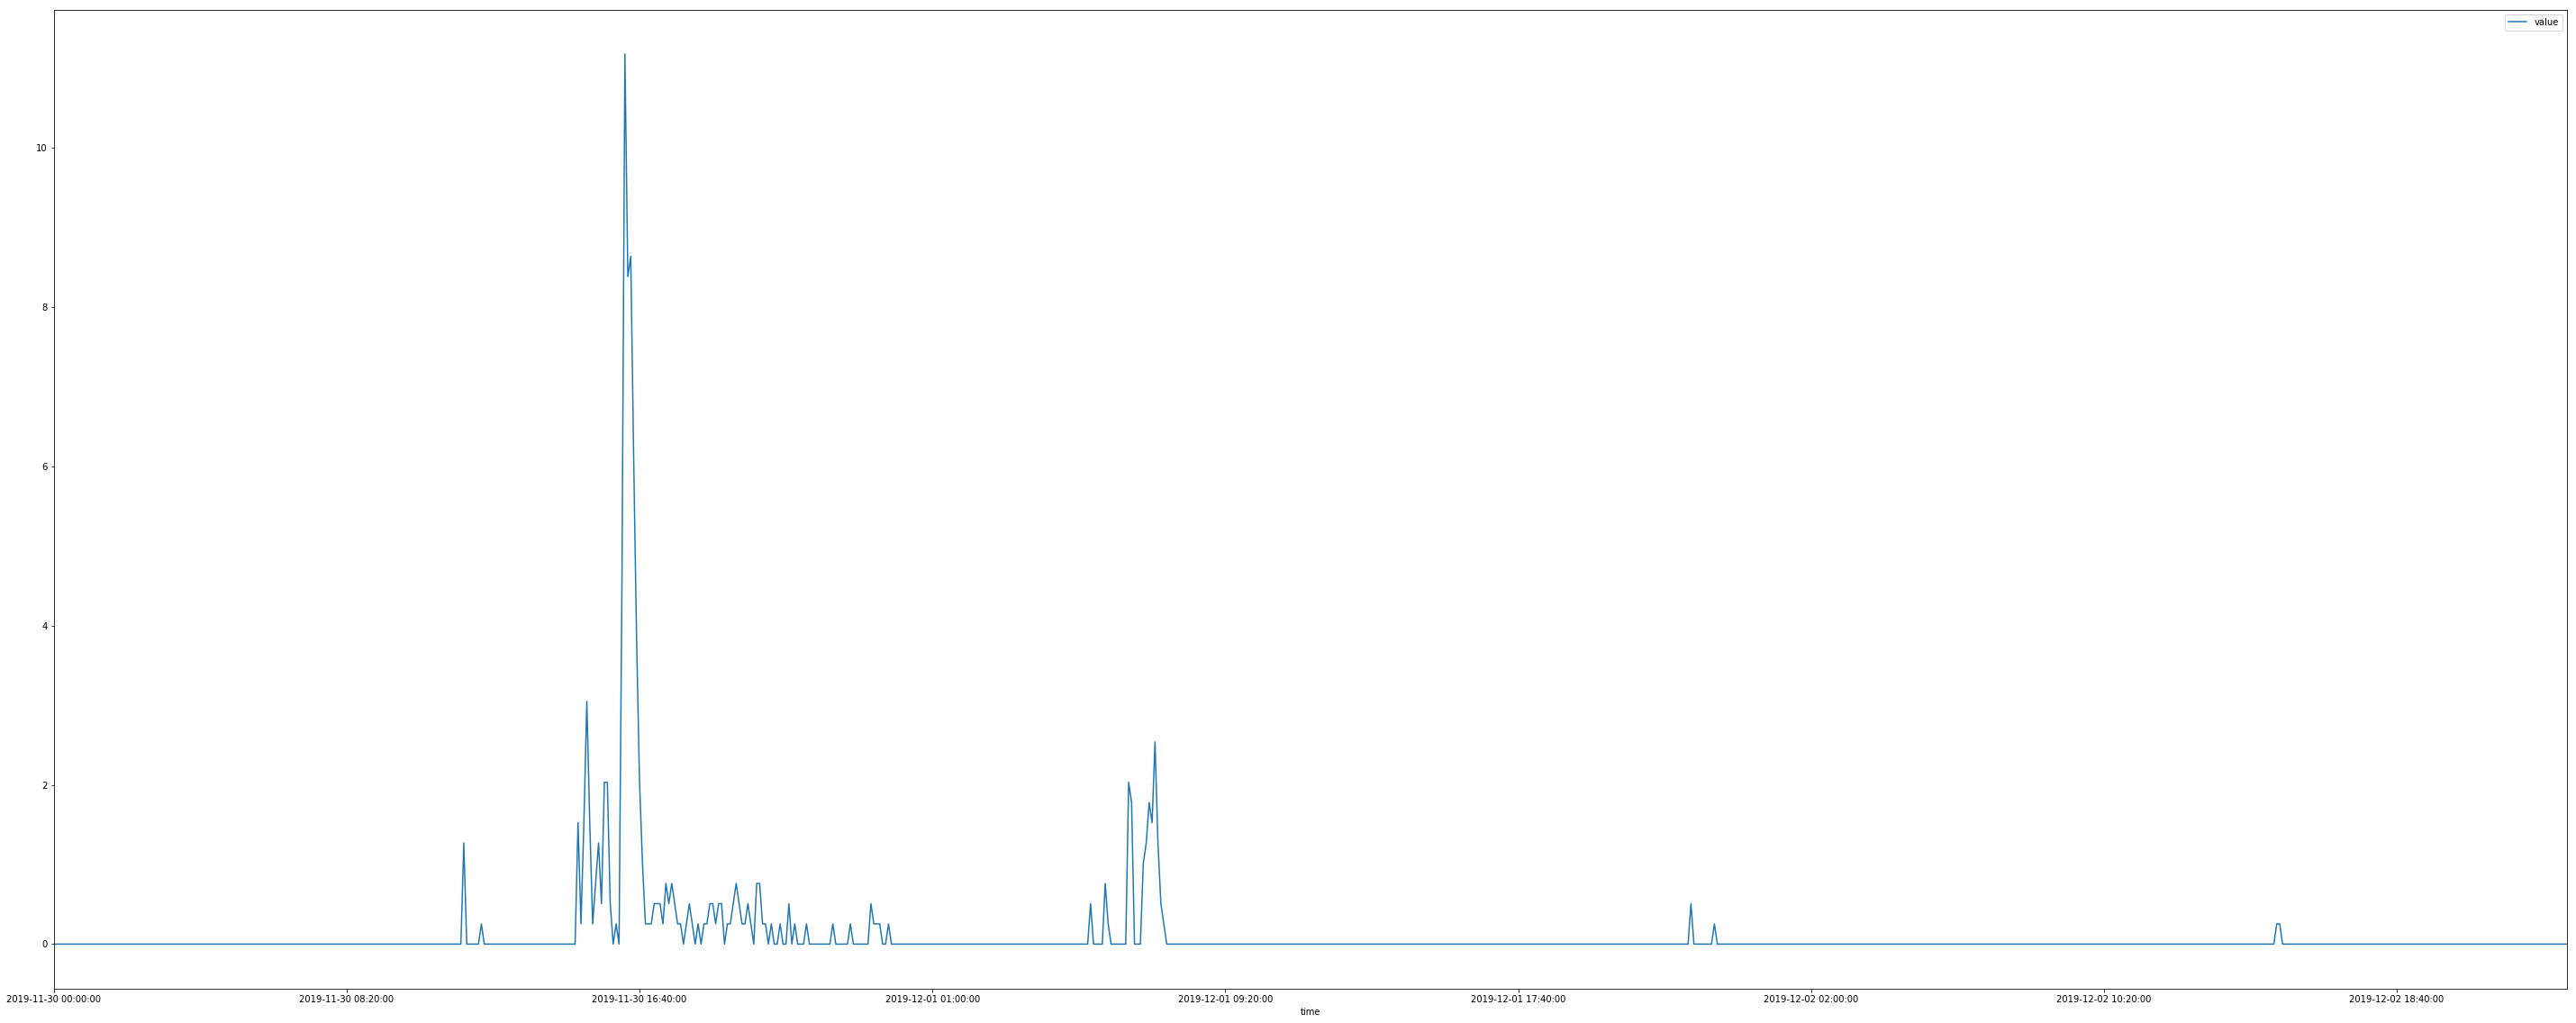

In [23]:
obs_df.plot.line(x='time', y='value' ,figsize=(50,20))

In [24]:
obs_df['time'] = pd.to_datetime(obs_df['time'], format=COMMON_DATE_TIME_FORMAT)
obs_df.set_index('time', inplace=True)
print(obs_df)

min15_ts = pd.DataFrame()
min15_ts['value'] = obs_df['value'].resample('15min', label='right', closed='right').sum()

print(min15_ts)

                     value
time                      
2019-11-30 00:00:00    0.0
2019-11-30 00:05:00    0.0
2019-11-30 00:10:00    0.0
2019-11-30 00:15:00    0.0
2019-11-30 00:20:00    0.0
...                    ...
2019-12-02 23:10:00    0.0
2019-12-02 23:15:00    0.0
2019-12-02 23:20:00    0.0
2019-12-02 23:25:00    0.0
2019-12-02 23:30:00    0.0

[859 rows x 1 columns]
                     value
time                      
2019-11-30 00:00:00    0.0
2019-11-30 00:15:00    0.0
2019-11-30 00:30:00    0.0
2019-11-30 00:45:00    0.0
2019-11-30 01:00:00    0.0
...                    ...
2019-12-02 22:30:00    0.0
2019-12-02 22:45:00    0.0
2019-12-02 23:00:00    0.0
2019-12-02 23:15:00    0.0
2019-12-02 23:30:00    0.0

[287 rows x 1 columns]


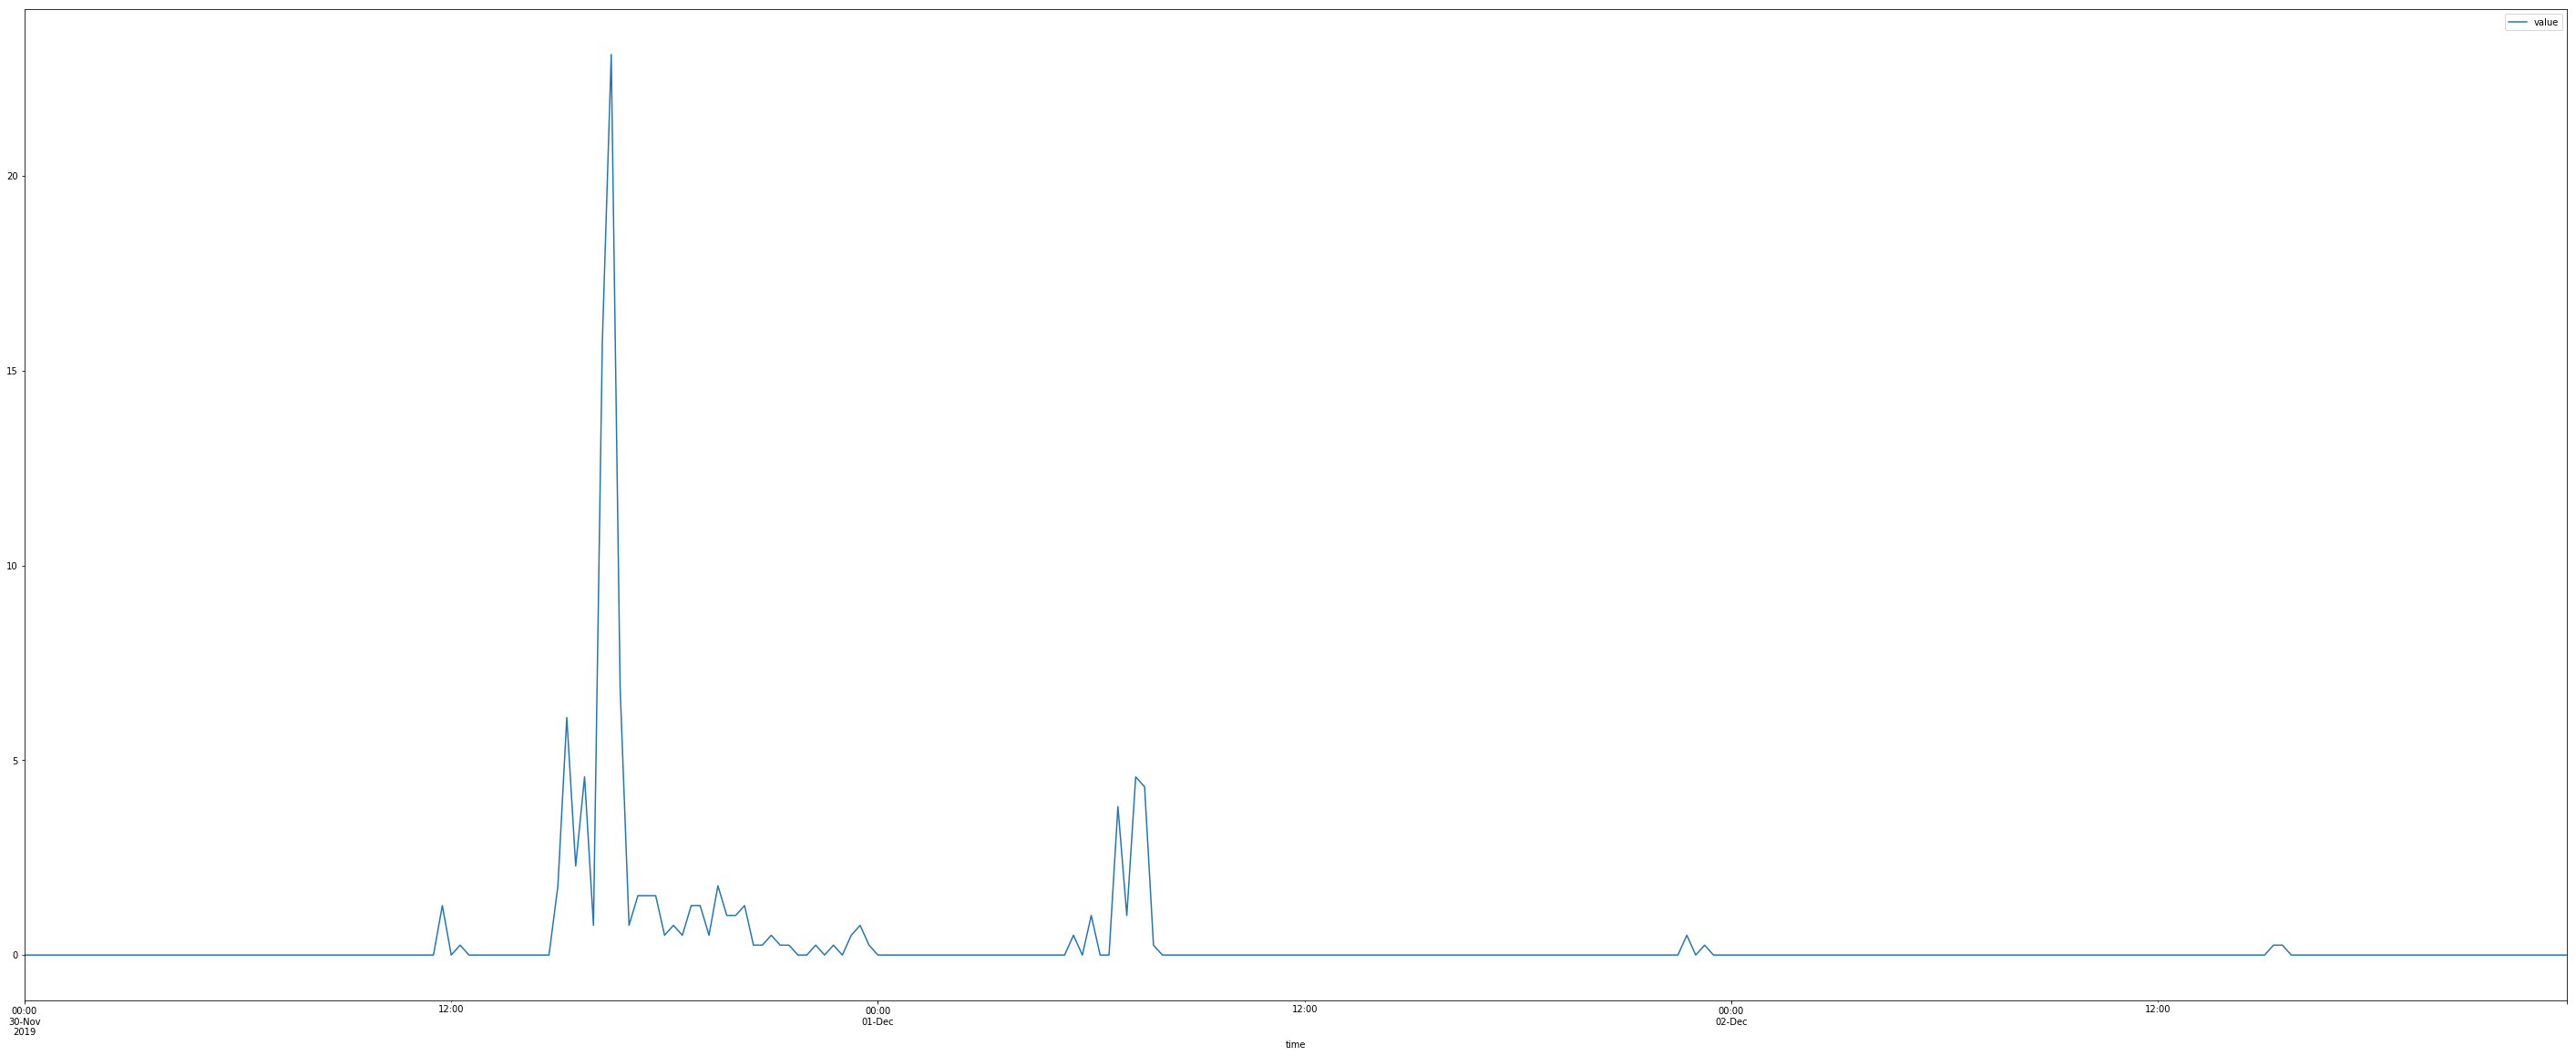

In [25]:
min15_ts.plot.line(y='value' ,figsize=(50,20))

In [26]:
fcst_df['time'] = pd.to_datetime(fcst_df['time'], format=COMMON_DATE_TIME_FORMAT)
fcst_df.set_index('time', inplace=True)
print(min15_ts)
print(fcst_df)

                     value
time                      
2019-11-30 00:00:00    0.0
2019-11-30 00:15:00    0.0
2019-11-30 00:30:00    0.0
2019-11-30 00:45:00    0.0
2019-11-30 01:00:00    0.0
...                    ...
2019-12-02 22:30:00    0.0
2019-12-02 22:45:00    0.0
2019-12-02 23:00:00    0.0
2019-12-02 23:15:00    0.0
2019-12-02 23:30:00    0.0

[287 rows x 1 columns]
                     value
time                      
2019-11-30 00:00:00  0.000
2019-11-30 00:15:00  0.000
2019-11-30 00:30:00  0.000
2019-11-30 00:45:00  0.000
2019-11-30 01:00:00  0.061
...                    ...
2019-12-02 22:30:00  0.006
2019-12-02 22:45:00  0.024
2019-12-02 23:00:00  0.054
2019-12-02 23:15:00  0.002
2019-12-02 23:30:00  0.000

[287 rows x 1 columns]


In [27]:
min15_ts.merge(fcst_df, how = 'left', on='time')

,value_x,value_y
time,,
2019-11-30 00:00:00,0.0,0.000
2019-11-30 00:15:00,0.0,0.000
2019-11-30 00:30:00,0.0,0.000
2019-11-30 00:45:00,0.0,0.000
2019-11-30 01:00:00,0.0,0.061
...,...,...
2019-12-02 22:30:00,0.0,0.006
2019-12-02 22:45:00,0.0,0.024
2019-12-02 23:00:00,0.0,0.054


In [28]:
min15_ts.rename(columns = {'value':'observed'}, inplace = True) 
fcst_df.rename(columns = {'value':'forecast'}, inplace = True) 
print(min15_ts)
print(fcst_df)

                     observed
time                         
2019-11-30 00:00:00       0.0
2019-11-30 00:15:00       0.0
2019-11-30 00:30:00       0.0
2019-11-30 00:45:00       0.0
2019-11-30 01:00:00       0.0
...                       ...
2019-12-02 22:30:00       0.0
2019-12-02 22:45:00       0.0
2019-12-02 23:00:00       0.0
2019-12-02 23:15:00       0.0
2019-12-02 23:30:00       0.0

[287 rows x 1 columns]
                     forecast
time                         
2019-11-30 00:00:00     0.000
2019-11-30 00:15:00     0.000
2019-11-30 00:30:00     0.000
2019-11-30 00:45:00     0.000
2019-11-30 01:00:00     0.061
...                       ...
2019-12-02 22:30:00     0.006
2019-12-02 22:45:00     0.024
2019-12-02 23:00:00     0.054
2019-12-02 23:15:00     0.002
2019-12-02 23:30:00     0.000

[287 rows x 1 columns]


In [38]:
merged_df = min15_ts.merge(fcst_df, how = 'left', on='time')
print(merged_df)

                     observed  forecast
time                                   
2019-11-30 00:00:00       0.0     0.000
2019-11-30 00:15:00       0.0     0.000
2019-11-30 00:30:00       0.0     0.000
2019-11-30 00:45:00       0.0     0.000
2019-11-30 01:00:00       0.0     0.061
...                       ...       ...
2019-12-02 22:30:00       0.0     0.006
2019-12-02 22:45:00       0.0     0.024
2019-12-02 23:00:00       0.0     0.054
2019-12-02 23:15:00       0.0     0.002
2019-12-02 23:30:00       0.0     0.000

[287 rows x 2 columns]


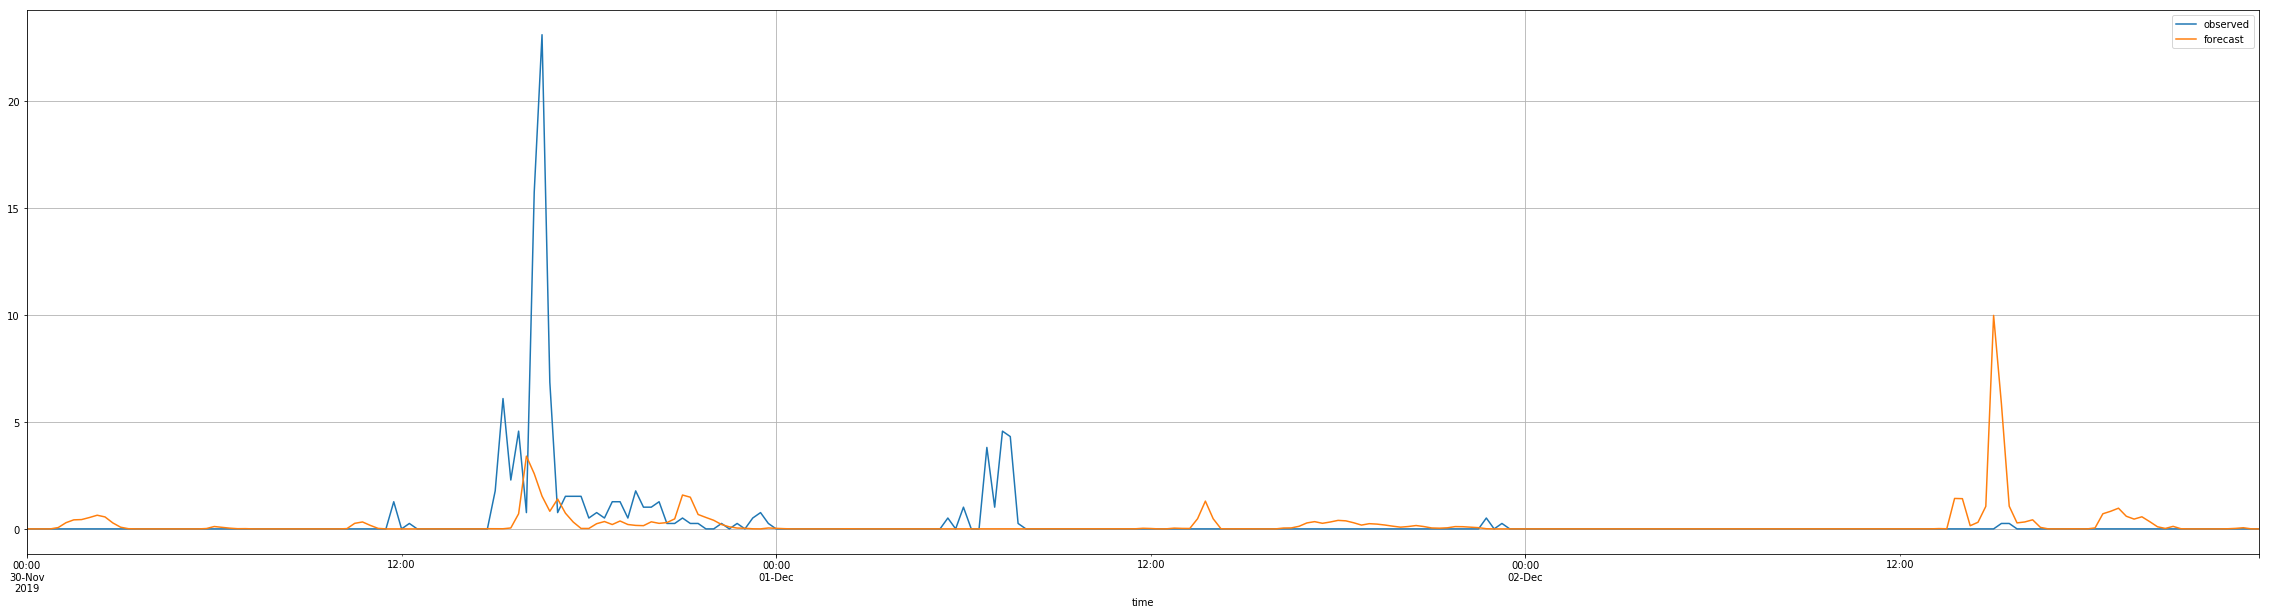

In [37]:
merged_df.plot.line(y=["observed", "forecast"], figsize=(40,10), grid=True)

In [39]:
from scipy.stats import ks_2samp

In [40]:
ks_2samp(merged_df['observed'], merged_df['forecast'])

Ks_2sampResult(statistic=0.3205574912891985, pvalue=1.6420885720306467e-13)

In [42]:
merged_df['cumulative_observed'] = merged_df['observed'].cumsum()
merged_df['cumulative_forecast'] = merged_df['forecast'].cumsum()
print(merged_df)

                     observed  forecast  cumulative_observed  \
time                                                           
2019-11-30 00:00:00       0.0     0.000                0.000   
2019-11-30 00:15:00       0.0     0.000                0.000   
2019-11-30 00:30:00       0.0     0.000                0.000   
2019-11-30 00:45:00       0.0     0.000                0.000   
2019-11-30 01:00:00       0.0     0.061                0.000   
...                       ...       ...                  ...   
2019-12-02 22:30:00       0.0     0.006               98.298   
2019-12-02 22:45:00       0.0     0.024               98.298   
2019-12-02 23:00:00       0.0     0.054               98.298   
2019-12-02 23:15:00       0.0     0.002               98.298   
2019-12-02 23:30:00       0.0     0.000               98.298   

                     cumulative_forecast  
time                                      
2019-11-30 00:00:00                0.000  
2019-11-30 00:15:00                0.0

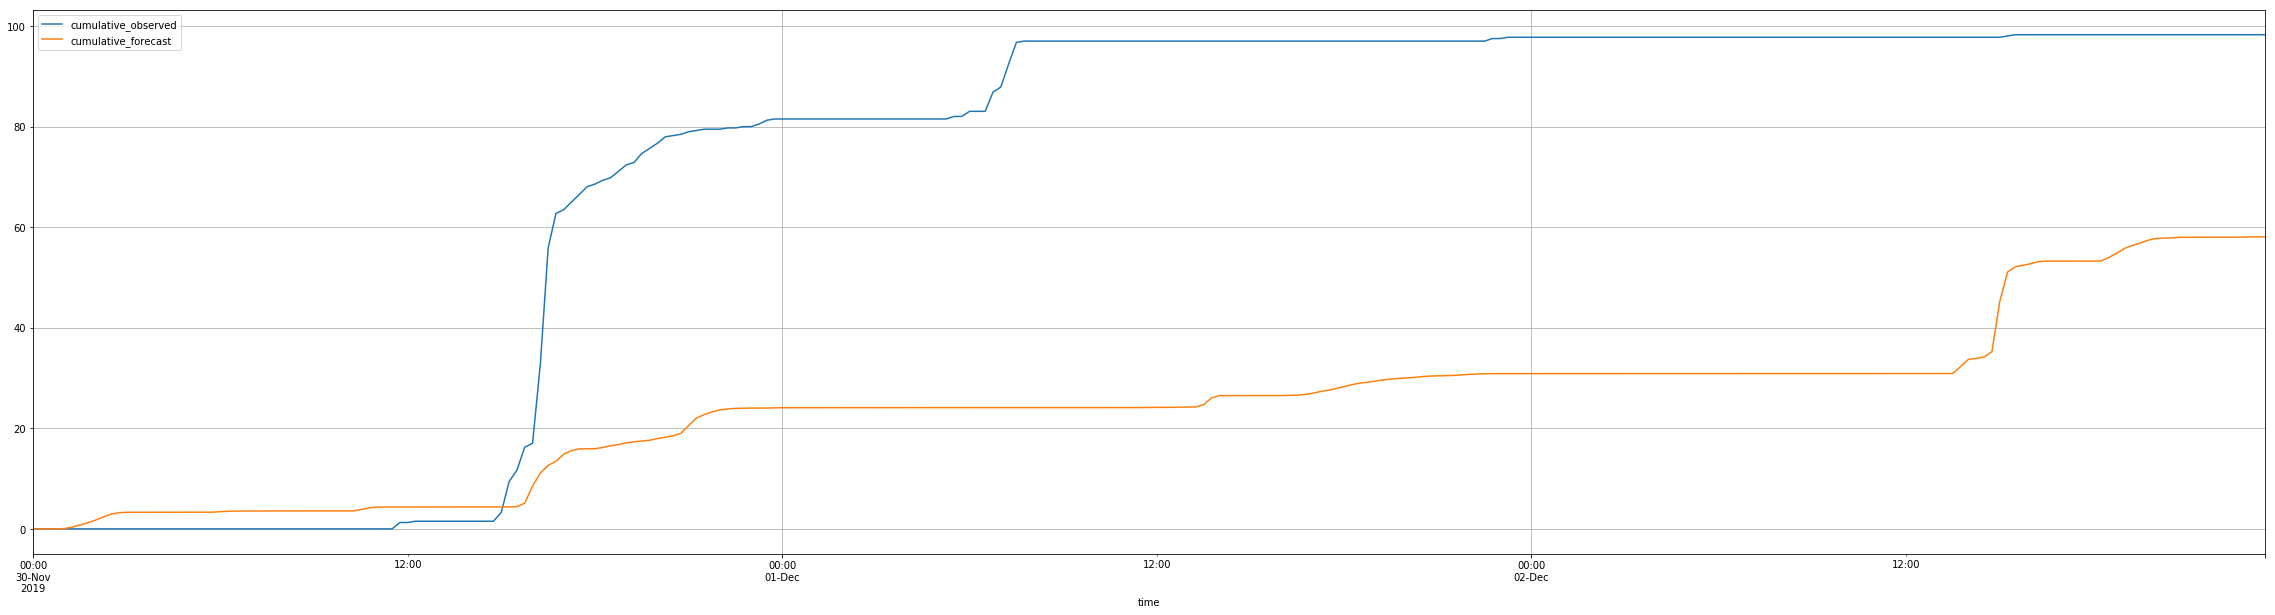

In [43]:
merged_df.plot.line(y=["cumulative_observed", "cumulative_forecast"], figsize=(40,10), grid=True)

In [70]:
from sklearn.metrics import accuracy_score
import numpy as np

In [56]:
print(merged_df['cumulative_observed'].values)
print(merged_df['cumulative_forecast'].values)

[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     1.27   1.27   1.524
  1.524  1.524  1.524  1.524  1.524  1.524  1.524  1.524  1.524  1.524
  3.302  9.398 11.684 16.256 17.018 32.766 55.88  62.738 63.5   65.024
 66.548 68.072 68.58  69.342 69.85  71.12  72.39  72.898 74.676 75.692
 76.708 77.978 78.232 78.486 78.994 79.248 79.502 79.502 79.502 79.756
 79.756 80.01  80.01  80.518 81.28  81.534 81.534 81.534 81.534 81.534
 81.534 81.534 81.534 81.534 81.534 81.534 81.534 81.534 81.534 81.534
 81.534 81.534 81.534 81.534 81.534 81.534 81.534 81.534 82.042 82.042
 83.058 83.058 83.058 86.868 87.884 92.456 96.774 97.028 97.028 97.028
 97.028 97.028 97.028 97.028 97.028 97.028 97.028 97.028 97.028 97.028
 97.028 97.028 97.

In [53]:
print(type(merged_df['cumulative_observed']))

<class 'pandas.core.series.Series'>


In [62]:
observed = merged_df['cumulative_observed'].values.tolist()
forecasted = merged_df['cumulative_forecast'].values.tolist()
print(observed)
print(type(observed))
#accuracy_score(merged_df['cumulative_observed'].values, merged_df['cumulative_forecast'].values)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.27, 1.27, 1.524, 1.524, 1.524, 1.524, 1.524, 1.524, 1.524, 1.524, 1.524, 1.524, 1.524, 3.302, 9.398, 11.684, 16.256, 17.018, 32.766, 55.879999999999995, 62.738, 63.5, 65.024, 66.548, 68.072, 68.58, 69.342, 69.85, 71.11999999999999, 72.38999999999999, 72.89799999999998, 74.67599999999999, 75.692, 76.708, 77.978, 78.232, 78.486, 78.994, 79.248, 79.50200000000001, 79.50200000000001, 79.50200000000001, 79.75600000000001, 79.75600000000001, 80.01000000000002, 80.01000000000002, 80.51800000000001, 81.28000000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002, 81.53400000000002,

In [66]:
print(merged_df)

                     observed  forecast  cumulative_observed  \
time                                                           
2019-11-30 00:00:00       0.0     0.000                0.000   
2019-11-30 00:15:00       0.0     0.000                0.000   
2019-11-30 00:30:00       0.0     0.000                0.000   
2019-11-30 00:45:00       0.0     0.000                0.000   
2019-11-30 01:00:00       0.0     0.061                0.000   
...                       ...       ...                  ...   
2019-12-02 22:30:00       0.0     0.006               98.298   
2019-12-02 22:45:00       0.0     0.024               98.298   
2019-12-02 23:00:00       0.0     0.054               98.298   
2019-12-02 23:15:00       0.0     0.002               98.298   
2019-12-02 23:30:00       0.0     0.000               98.298   

                     cumulative_forecast  
time                                      
2019-11-30 00:00:00                0.000  
2019-11-30 00:15:00                0.0

In [67]:
merged_df['diff'] = merged_df["cumulative_observed"] - merged_df["cumulative_forecast"]

In [68]:
merged_df

,observed,forecast,cumulative_observed,cumulative_forecast,diff
time,,,,,
2019-11-30 00:00:00,0.0,0.000,0.000,0.000,0.000
2019-11-30 00:15:00,0.0,0.000,0.000,0.000,0.000
2019-11-30 00:30:00,0.0,0.000,0.000,0.000,0.000
2019-11-30 00:45:00,0.0,0.000,0.000,0.000,0.000
2019-11-30 01:00:00,0.0,0.061,0.000,0.061,-0.061
...,...,...,...,...,...
2019-12-02 22:30:00,0.0,0.006,98.298,58.011,40.287
2019-12-02 22:45:00,0.0,0.024,98.298,58.035,40.263
2019-12-02 23:00:00,0.0,0.054,98.298,58.089,40.209


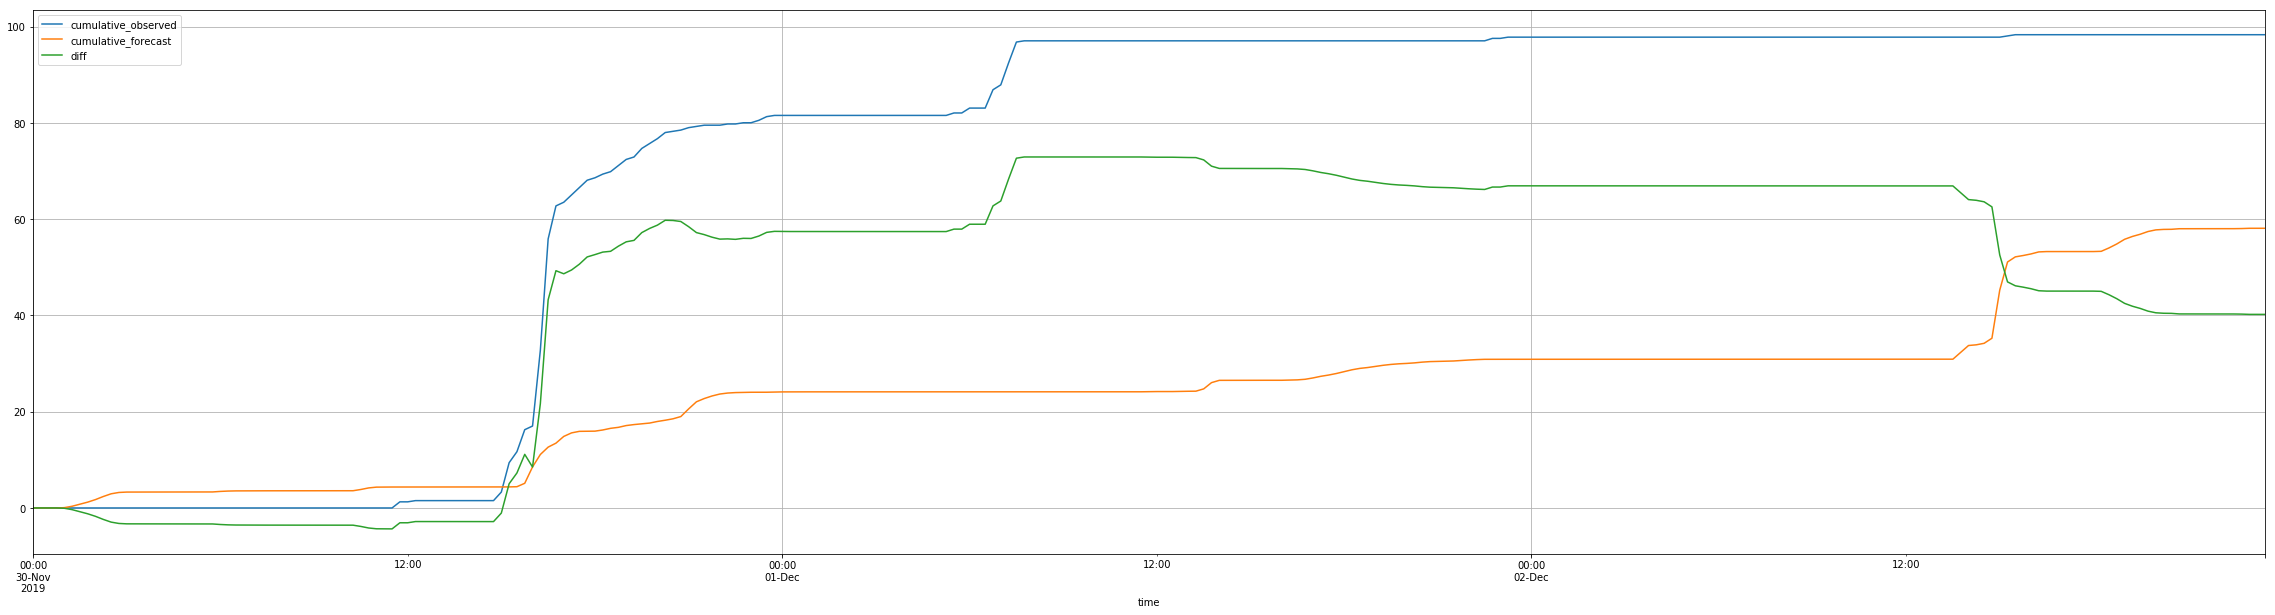

In [69]:
merged_df.plot.line(y=["cumulative_observed", "cumulative_forecast", "diff"], figsize=(40,10), grid=True)

In [71]:
merged_df['diff_square'] = np.power((merged_df['diff']),2)
print(merged_df)

                     observed  forecast  cumulative_observed  \
time                                                           
2019-11-30 00:00:00       0.0     0.000                0.000   
2019-11-30 00:15:00       0.0     0.000                0.000   
2019-11-30 00:30:00       0.0     0.000                0.000   
2019-11-30 00:45:00       0.0     0.000                0.000   
2019-11-30 01:00:00       0.0     0.061                0.000   
...                       ...       ...                  ...   
2019-12-02 22:30:00       0.0     0.006               98.298   
2019-12-02 22:45:00       0.0     0.024               98.298   
2019-12-02 23:00:00       0.0     0.054               98.298   
2019-12-02 23:15:00       0.0     0.002               98.298   
2019-12-02 23:30:00       0.0     0.000               98.298   

                     cumulative_forecast    diff  diff_square  
time                                                           
2019-11-30 00:00:00                0.00

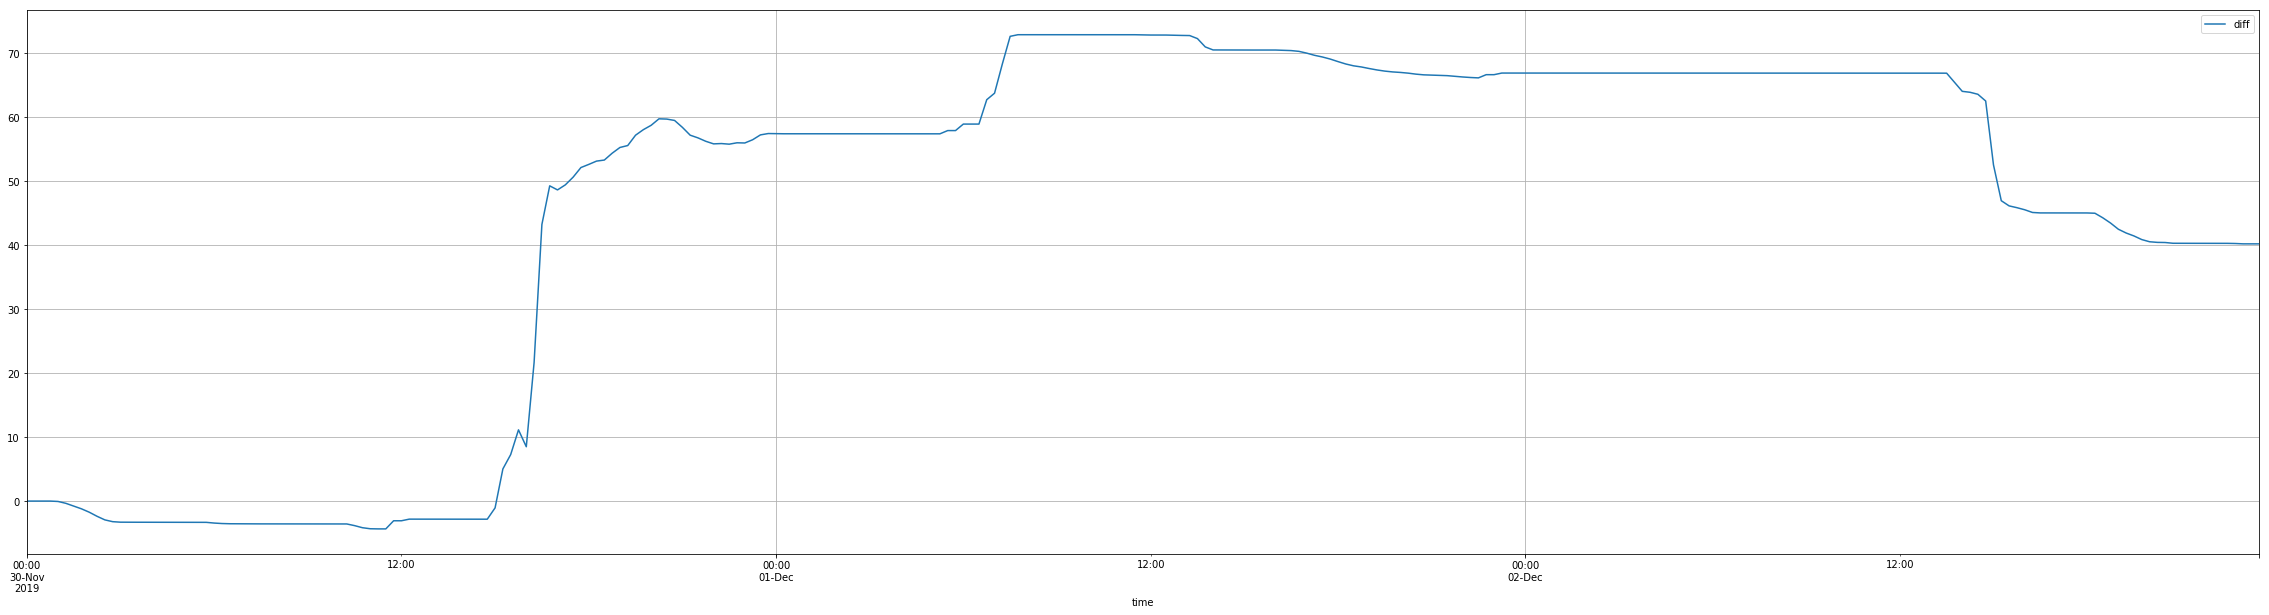

In [74]:
merged_df.plot.line(y=["diff"], figsize=(40,10), grid=True)

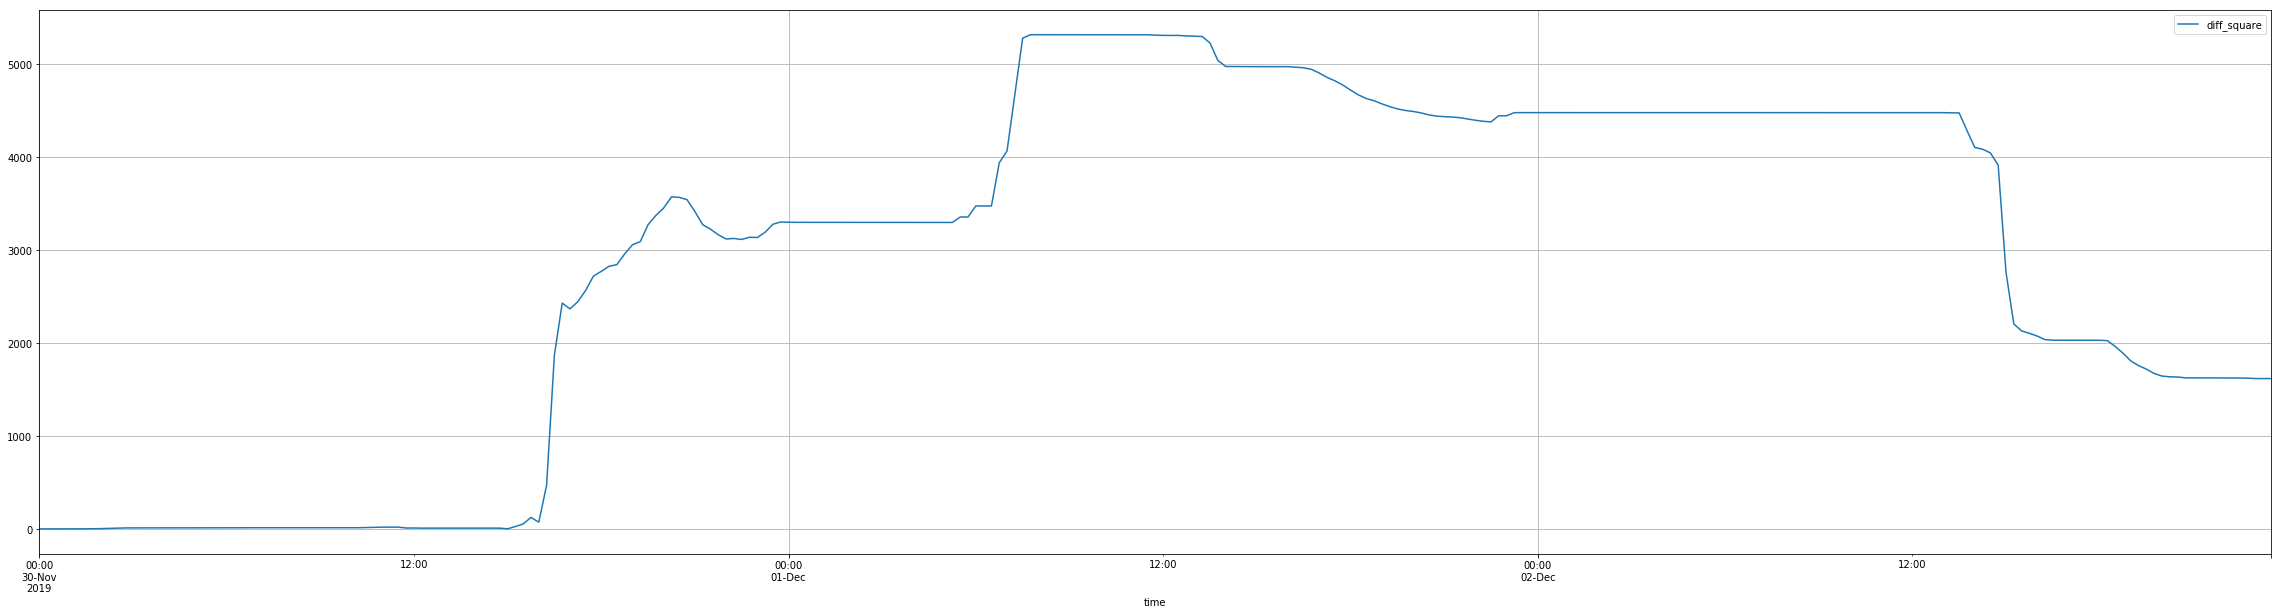

In [75]:
merged_df.plot.line(y=["diff_square"], figsize=(40,10), grid=True)